### Import necessary packages

In [1]:
from fastai.vision.all import *
import torch
import cv2
import matplotlib.pyplot as plt

# Checking the device compatibility
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # to select device as cpu only put this torch.device('cpu') 
print('Using device:', device)
#print(torch.cuda.get_device_name(0))
#print(torch.__version__)

Using device: cuda


### Define custom functions

In [2]:
def get_y(filename):
    return (path_labels / Path(filename.stem + filename.suffix ))
#Calculate the proportion of correct predictions
def original_ac(predictions, target):
    pred_hot1_decoded = predictions.argmax(dim=1)
    correct_predictions = ( TensorBase(pred_hot1_decoded) == TensorBase(target) )
    correct_predictions = correct_predictions.float()
    return correct_predictions.mean()

#Number of correctly determined porus pixels divided by number of all porus pixels
def porus_ac(predictions, target):   
    pred_hot1_decoded = predictions.argmax(dim=1)
    porosity_in_target = target == 1
    correct_porosity = torch.logical_and( TensorBase(porosity_in_target), TensorBase(pred_hot1_decoded) )
    correct_porosity = correct_porosity.float()       
    return correct_porosity.sum() / porosity_in_target.float().sum()

metrics = [porus_ac, original_ac]

### Loading the data

In [3]:
learner = load_learner('/home/susa03/post_project/unet_fastai/model_bse.pkl')

### Load test data

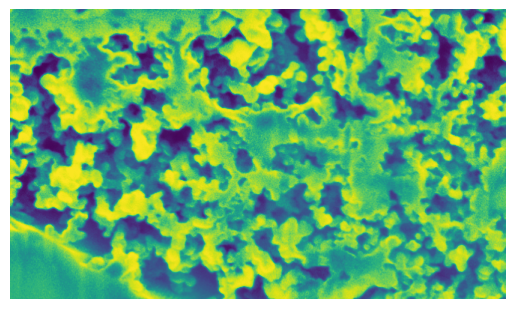

test image size: (387, 662)


In [11]:
# Path to your test image
#image_path = '/home/susa03/post_project/post_dataset/test_data/ZrO2-P01-from-Repos/esb-corrected-3x3x3-toolip/zirconiumP01_000.png'
image_path = '/home/susa03/post_project/post_dataset/test_data/2011-Oct-Porous-carbon-Opel2-Torben-Prill-GV_and_Segmented/GV/Gray_Value005.tif'
#image_path = '/home/susa03/post_project/post_dataset/synthetic_data/sorted_data/bse/00007.tif'
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
plt.imshow(image)
plt.axis('off')
plt.show()
print(f'test image size: {image.shape}')

### Prediction and visualization

In [12]:
pred_class, pred_idx, pred_probs = learner.predict(image)

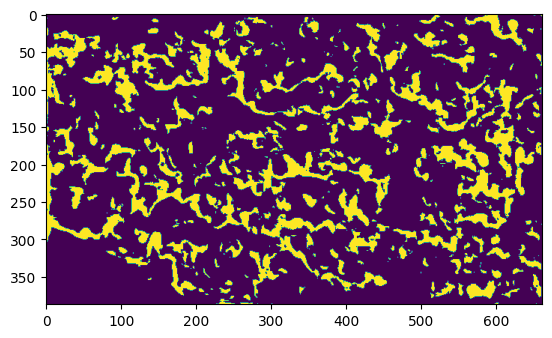

In [13]:
plt.imshow(pred_class)